# Week 2 - BBVI

https://arxiv.org/abs/1401.0118

## Idea:

  * Take MC samples from model to evaluate $f$
  * Form approximate gradient
  * Optimize variational parameters
  * Use different strategies to reduce the variance of the gradient estimates
  * subsampling (batching) to speed up
  * adagrad

In a probabilistic model, let $x$ be observations, $z$ be latent
variables, and $\lambda$ the free parameters of a variational
distribution $q(z | \lambda)$.  Our goal is to approximate $p(z |
x)$ with a setting of $\lambda$.  In variational inference we optimize
the Evidence Lower BOund (ELBO),
\begin{align} \label{eq:objective}
  L(\lambda) \triangleq \textrm{E}_{q_\lambda(z)}[\log p(x,z) - \log q(z)].
\end{align}

To optimize, uses the score function trick to find the gradient (explained in the appendix). See also:

http://blog.shakirm.com/2015/11/machine-learning-trick-of-the-day-5-log-derivative-trick/

Rao-Blackwell: reduce the variance by only considering variables within the Markov blanket of the current coordinate.

*Without a generic algorithm, approximating the posterior of any of these models is a project in itself*

# Rao Blackwell

Implement the example in the paper: find an estimator for J(x, y), and make it better. 
Here p(x, y) is a joint normal distribution.

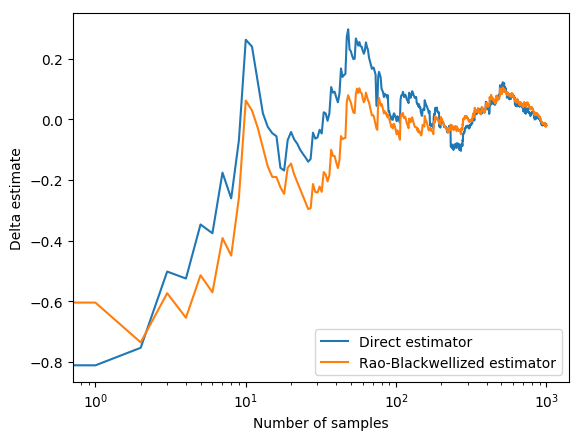

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('default')

def J(x, y):
    return x ** 2 - .1 * (y - .3) ** 4

xs = np.random.randn(1000, )
ys = np.random.randn(xs.size, )

J_hatx = lambda x: J(x, ys).mean()

true_val = J(np.random.randn(100000, ), np.random.randn(100000, )).mean()

# Compute the expectation in the normal way.
samps = J(xs, ys)
E_samps = np.cumsum(samps) / (np.arange(xs.size) + 1)
plt.semilogx(E_samps - true_val)

samps = np.array([J_hatx(x) for x in xs])
E_samps = np.cumsum(samps) / (np.arange(xs.size) + 1)
plt.semilogx(E_samps - true_val)
plt.xlabel('Number of samples')
plt.ylabel('Delta estimate')

plt.legend(('Direct estimator', 'Rao-Blackwellized estimator'))